In [228]:
import numpy as np
import plotly.graph_objects as go

In [1]:
from standard_model_1050 import Momentum

In [229]:
def sigmoid(x):
    return 1/(1+(1/(np.power(np.e,x))))

def relu(x):
    return np.maximum(0,x)

In [230]:
from graph_support import before_func

In [231]:
@before_func(title = "シグモイド関数",x_name= "input",y_name= "output")
def plot_func(x_data,y_data,graph):
    fig = graph.fig
    fig.add_trace(
            go.Scatter(
                x=x_data,
                y=y_data,
                name = "計測点",
                mode='markers',
                opacity=0.8,
            )
        )
    fig.update_layout(
        legend=dict(
            x=1.2,
            y=0.5,
           
            traceorder="normal",
            font=dict(
                size=12,
            ),
        ),
    )
    fig.show()

In [232]:
x_array = np.linspace(-10,10,100)
y_array = np.array([sigmoid(i) for i in x_array])
y_array_relu = np.array([relu(i) for i in x_array])


In [233]:
plot_func(x_data = x_array,y_data = y_array)

In [234]:
plot_func(x_data = x_array,y_data = y_array_relu)

配列の計算

In [235]:
# 1次元
A = np.array([1,2,3,4])
print(A.ndim)
print(A.shape[0])

1
4


In [236]:
# 2次元
B = np.array([[1,2],[3,4],[5,6]])

print(B.ndim)
print(B.shape[0])

2
3


In [237]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [238]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [239]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

np.dot(X,W)


array([ 5, 11, 17])

 Neuralのモデル化

In [273]:
X = np.array([1.0,0.5])
W = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B = [[0.1,0.2,0.3]]

A = np.dot(X,W) + B
Z1 = sigmoid(A)

In [275]:
np.argmax(B,axis = 1)

array([2])

In [241]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = [0.1,0.2]
A2 = np.dot(Z1,W2)+B2 

In [242]:
Z2 = sigmoid(A2)

In [243]:
Z2

array([0.62624937, 0.7710107 ])

In [244]:
def identify_function(x):
    return x

In [245]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3)+ B3
Y = identify_function(A3)

In [246]:
Y

array([0.31682708, 0.69627909])

この関数が分類問題の出力関数になる

In [247]:
def soft_max(a:np.array):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a/sum_exp_a


In [248]:
import numpy as np

# 2乗和誤差

In [249]:
def sum_squared_error(y:np.array,t:np.array)->float:
    return 0.5*np.sum((y-t)**2)

# 交差エントロピー誤差

In [250]:
def cross_entropy_error(y:np.array,t:np.array)->float:
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

抽出可能!

In [251]:
test_data = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9]])
test_data[[1,2,3]]

array([[2],
       [3],
       [4]])

In [252]:
sample = np.array([1,2,3])
sample.reshape(1,sample.size)

array([[1, 2, 3]])

# 偏微分

In [253]:
import numpy as np

In [254]:
x = np.array([[1,2,3],[3,4,3]])
print(x.size)
print(x.shape[1])

6
3


In [255]:
def function_2(x:np.array):
    return np.sum(x**2)

In [256]:
x = np.array([1,2]).reshape(1,np.array([1,2]).size)
x.shape

(1, 2)

In [257]:
def reshape_array(_x:np.array):
    if _x.ndim ==1:
        x = _x.reshape(1,_x.size)
        grad = np.zeros_like(x)
        return x,grad
    else:
        grad = np.zeros_like(_x)
        return _x,grad
    
def return_grad_shape(_x:np.array):
    if _x.shape[0] ==1:
        x = _x.reshape(_x.size)
        return x
    else:
        return _x

In [258]:
def numerical_gradient(f,_x:np.array):
    h = 1e-4
    x,grad = reshape_array(_x)
    for index in range(x.size):
        _index = 0
        if index < x.shape[1]:
            temp_val = x[_index][index]
            x[_index][index] = temp_val+h
            fxh1 = f(x)
            x[_index][index] = temp_val-h
            fxh2 = f(x)
            grad[_index][index] = (fxh1 - fxh2)/(2*h)
            x[_index][index] = temp_val
        else:
            _index += 1
            while index > x.shape[1]:
                index -=x.shape[1]
            index-=1
            temp_val = x[_index][index]
            x[_index][index] = temp_val+h
            fxh1 = f(x)
            x[_index][index] = temp_val-h
            fxh2 = f(x)
            grad[_index][index] = (fxh1 - fxh2)/(2*h)
            x[_index][index] = temp_val
        
    return return_grad_shape(grad)

In [259]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

勾配降下法

In [260]:
def gradient_descent(f,init_x:np.array,lr = 0.01,step_num = 100):
    x = init_x
    x_history:list = []

    for _ in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x,np.array(x_history)


In [261]:
x,x_history = gradient_descent(function_2,np.array([-3.0,4.0]),lr=0.1)

In [262]:
x_history.shape

(100, 2)

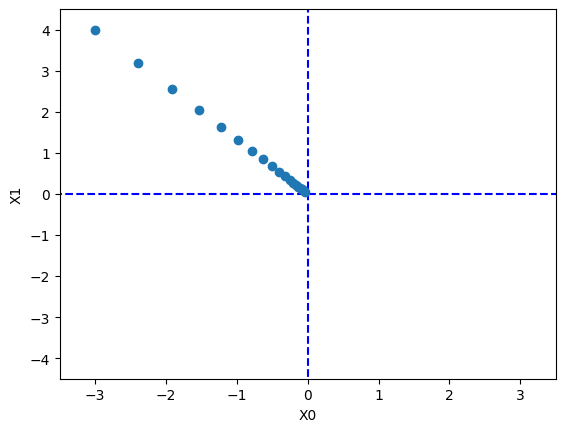

In [263]:
import matplotlib.pylab as plt

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [264]:
class SimpleNet(object):
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z  = self.predict(x)
        y = soft_max(z)
        loss = cross_entropy_error(y,t)
        return loss

In [265]:
net = SimpleNet()
net.W

array([[-0.3601012 ,  1.2910637 , -0.31915442],
       [ 0.93706193,  1.43622157,  0.41809544]])

In [266]:
x = np.array([0.6,0.9])
p = net.predict(x)
t = np.array([1,0,0])

In [276]:
x = np.array([[1,2],[3,4]])
for i,index in enumerate(x):
    print(i)
    print(index)

0
[1 2]
1
[3 4]


In [267]:
net.loss(x,t)

2.1975610320580294

In [268]:
def f(w):
    return net.loss(x,t)

In [269]:
dw = numerical_gradient(f,net.W)

In [270]:
dw

array([[0.9794741 , 0.20050323, 1.40511115],
       [1.46921115, 0.30075484, 2.10766673]])